<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0409_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 6주차 과제2
- mpg와 타이타닉 데이터를 groupby 등으로 깔끔하게 정리해 비교 시각화하기
- 최소 5개 이상, 그동안 배운 그래프 필수적으로 1개 이상 사용

**1. mpg 데이터 비교 시각화**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mpg 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

mpg = pd.read_csv('/content/drive/My Drive/mpg.csv')
mpg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [2]:
# 제조사별 평균 도시 연비 비교
manu_cty = mpg.groupby('manufacturer').agg(mean_cty=('cty','mean'))
manu_cty

,mean_cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


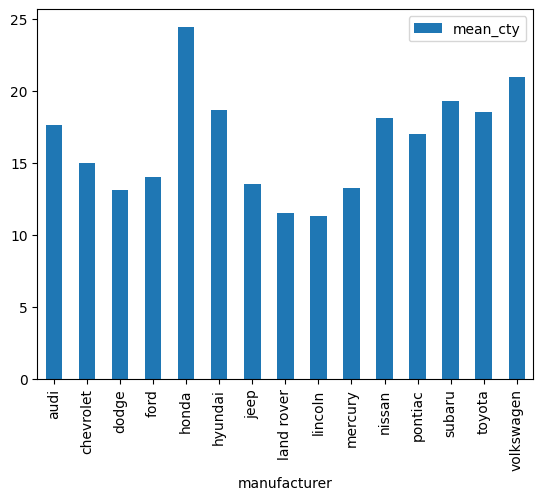

In [3]:
manu_cty.plot(kind='bar', y='mean_cty')
plt.xticks(rotation=90)
plt.show()

In [4]:
# 제조사별 평균 고속도로 연비 비교
manu_hwy = mpg.groupby('manufacturer').agg(mean_hwy=('hwy','mean'))
manu_hwy

,mean_hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


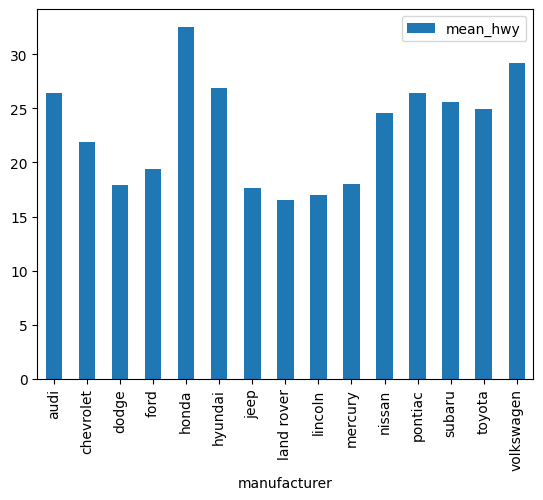

In [5]:
manu_hwy.plot(kind='bar', y='mean_hwy')
plt.xticks(rotation=90)
plt.show()

In [6]:
# 제조사별 평균 도시 연비와 고속도로 연비 동시 비교
manu_total = pd.merge(manu_cty, manu_hwy, on='manufacturer')
manu_total = manu_total.reset_index()
manu_total

,manufacturer,mean_cty,mean_hwy
0,audi,17.611111,26.444444
1,chevrolet,15.000000,21.894737
2,dodge,13.135135,17.945946
3,ford,14.000000,19.360000
4,honda,24.444444,32.555556
5,hyundai,18.642857,26.857143
6,jeep,13.500000,17.625000
7,land rover,11.500000,16.500000
8,lincoln,11.333333,17.000000
9,mercury,13.250000,18.000000


<Axes: xlabel='manufacturer'>

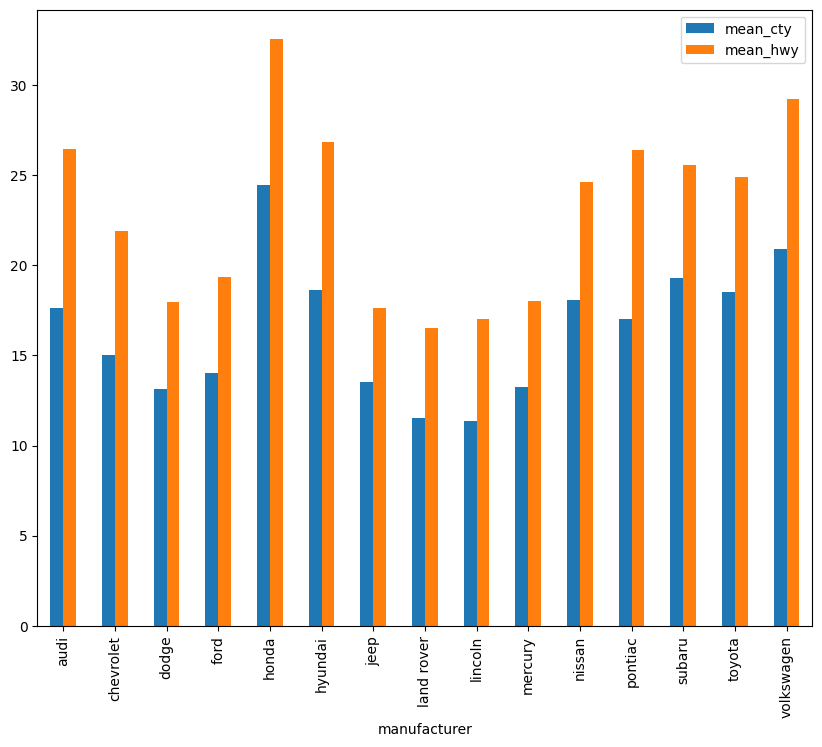

In [7]:
manu_total.plot(kind='bar', x='manufacturer', y=['mean_cty', 'mean_hwy'], figsize=(10,8))

<ipython-input-10-1474651b918a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(manu_cty.index, rotation=90)
<ipython-input-10-1474651b918a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(manu_hwy.index, rotation=90)


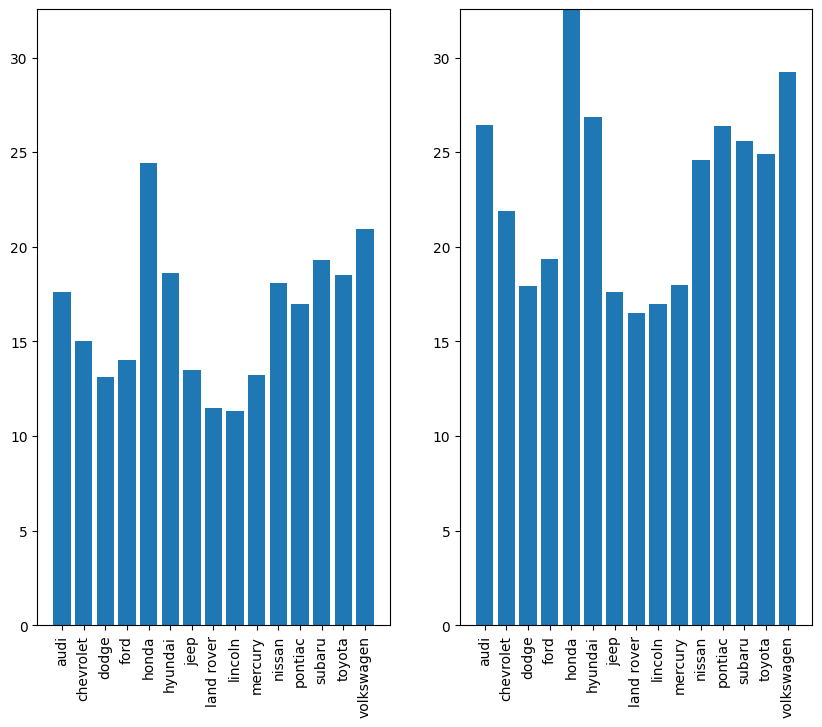

In [10]:
# subplot 사용해 그래프 여러 개 그리기

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax[0].set_xticklabels(manu_cty.index, rotation=90)
ax[0].bar(manu_cty.index, manu_cty['mean_cty'])

ax[1].set_xticklabels(manu_hwy.index, rotation=90)
ax[1].bar(manu_hwy.index, manu_hwy['mean_hwy'])

# 두 그래프의 y 축 범위를 동일하게 설정
max_value = max(max(manu_cty['mean_cty']), max(manu_hwy['mean_hwy']))
ax[0].set_ylim(0, max_value)
ax[1].set_ylim(0, max_value)

plt.show()

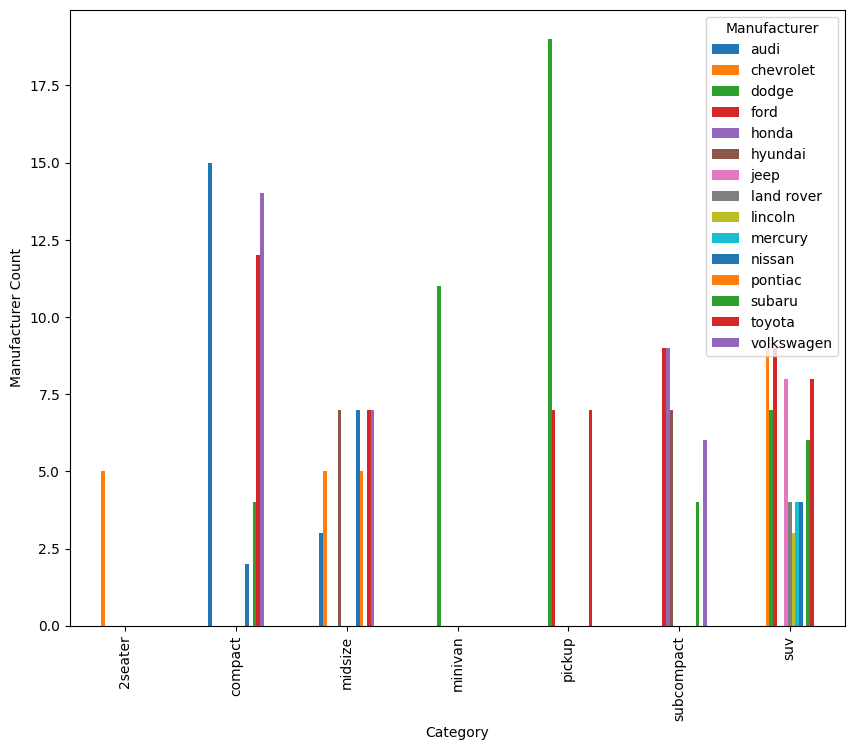

In [11]:
# 카테고리별 제조사 비교
cate_manu = mpg.groupby(['category', 'manufacturer']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 8))

cate_manu.plot(kind='bar', ax=ax)

plt.xlabel('Category') # x축 레이블 설정
plt.ylabel('Manufacturer Count') # y축 레이블 설정
plt.legend(title='Manufacturer', loc='upper right') # 범례 표시

plt.show()


**2. 타이타닉 데이터 비교 시각화**

In [12]:
# titanic 데이터 불러오기
import seaborn as sns
tit = sns.load_dataset('titanic')
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
# 객실등급별 평균 요금 비교
class_fare = tit.groupby('pclass').agg(mean_fare=('fare','mean'))
class_fare

,mean_fare
pclass,
1,84.154687
2,20.662183
3,13.675550


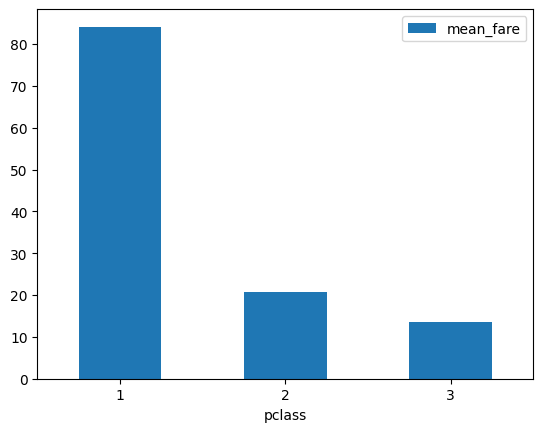

In [14]:
class_fare.plot(kind='bar', y='mean_fare')
plt.xticks(rotation=0)
plt.show()

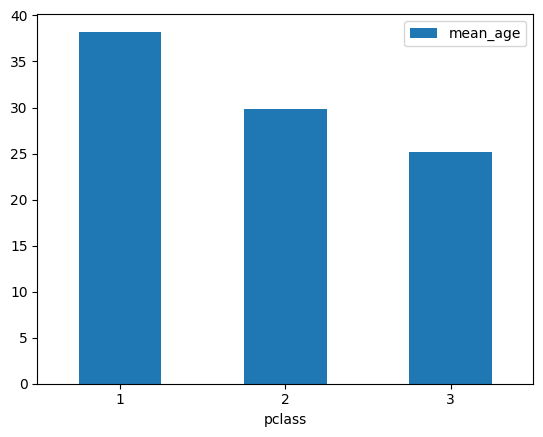

In [15]:
# 객실등급별 평균 나이 비교
class_age = tit.groupby('pclass').agg(mean_age=('age','mean'))
class_age.plot(kind='bar', y='mean_age')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='pclass', ylabel='count'>

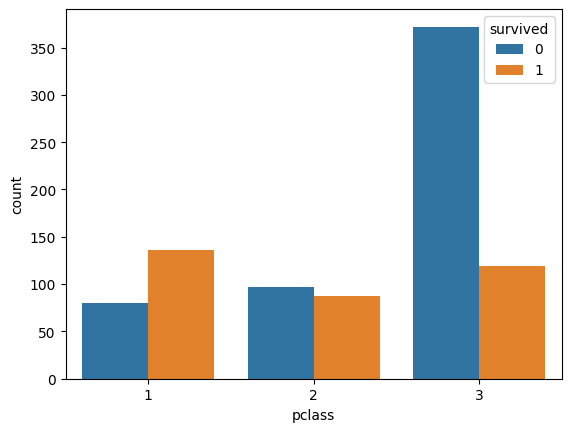

In [16]:
# 객실등급별 생존수 비교
sns.countplot(x='pclass', hue='survived', data = tit)

<Axes: xlabel='pclass', ylabel='count'>

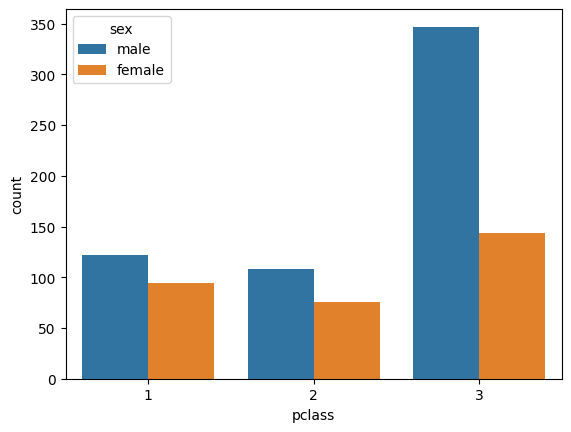

In [17]:
# 객실등급별 성비 비교
sns.countplot(x='pclass', hue='sex', data = tit)

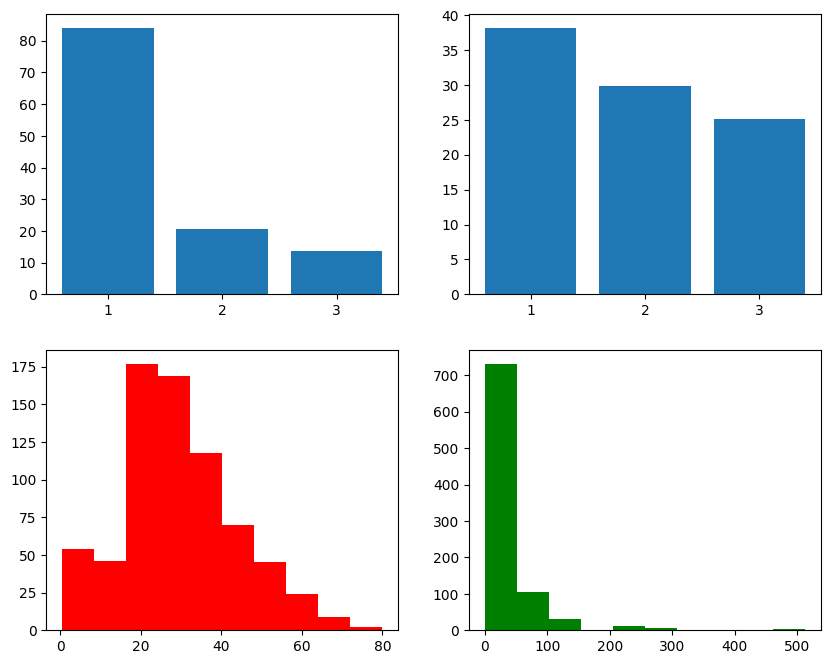

In [33]:
# subplot 사용해 그래프 여러 개 그리기

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0,0].set_xticks([1,2,3])
ax[0,0].bar(class_fare.index, class_fare['mean_fare'])

ax[0,1].set_xticks([1,2,3])
ax[0,1].bar(class_age.index, class_age['mean_age'])

ax[1,0].hist(tit['age'], facecolor='red')
ax[1,1].hist(tit['fare'], facecolor='green')

plt.show()